## Preparation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline

## Task 1

### Velocity as a linear system:

#### Make grid

In [3]:
w = 1
Y, X = np.mgrid[-w:w:20j, -w:w:20j]

#### Get A and the linear system (using $A_\alpha$ in the exercise sheet)

In [267]:
a = .1
A = np.array([[a, a],
              [-.25, 0]])

U = A[0][0]*X + A[0][1]*Y
V = A[1][0]*X + A[1][1]*Y

#### Compute eigenvalue

In [5]:
np.linalg.eig(A)

(array([0.05+0.15j, 0.05-0.15j]),
 array([[-0.16903085-0.50709255j, -0.16903085+0.50709255j],
        [ 0.84515425+0.j        ,  0.84515425-0.j        ]]))

#### Plot the vector field and one representative trajectory (using Euler's method)

Euler's Method

In [6]:
def euler(x0, vx, maxstep=100, stepsize=0.01, backward=-1):
    # vx the velocity function of x, as a numpy.array
    # x0 initial point, as a numpy.array
    # backward: -1 means forward, 1 means backward
    # return trajactory
    x = None
    nx = x0
    traj = [nx]
    
    for i in range(maxstep):
        x = nx
        v = vx(x)
        nx = x - backward*stepsize*v
        traj.append(nx)
        
    return np.array(traj)

Velocity for task1

In [7]:
def vx_task1_test(x, a=.1):
    a = .1
    A = np.array([[a, a],
              [-.25, 0]])

    u = A[0][0]*x[0] + A[0][1]*x[1]
    v = A[1][0]*x[0] + A[1][1]*x[1]
    
    return np.array([u,v])

Velocity for task3

In [8]:
def vx_task3(x, a=1):
    u = a*x[0]-x[1]-x[0]*(x[0]**2+x[1]**2)
    v = x[0]+a*x[1]-x[1]*(x[0]**2+x[1]**2)
    return np.array([u,v])

Get a representative orbit:

In [9]:
traj = euler(np.array([1,-1]), vx_task1, maxstep=10000, backward=1)
trajx = traj[:, 0]
trajy = traj[:, 1]

Plot:

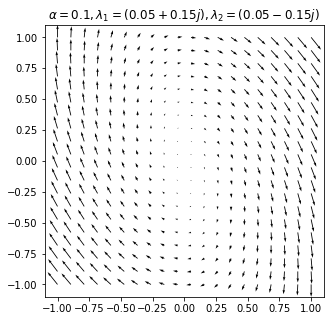

In [268]:
fig1 = plt.figure(figsize=(5, 5))

fig1a = fig1.add_subplot()

fig1a.quiver(X, Y, U, V)

lam = np.round(np.linalg.eig(A)[0], 2)
plt.title(r"$\alpha={}, \lambda_1={}, \lambda_2={}$".format(a, lam[0], lam[1]))

plt.savefig(r".\plots\Task1_testQuiver")
plt.show()

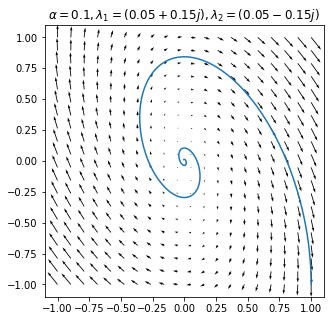

In [263]:
fig1 = plt.figure(figsize=(5, 5))

fig1a = fig1.add_subplot()

fig1a.quiver(X, Y, U, V)
fig1a.plot(trajx, trajy) # plot the trajactory from Euler method

lam = np.round(np.linalg.eig(A)[0], 2)
plt.title(r"$\alpha={}, \lambda_1={}, \lambda_2={}$".format(a, lam[0], lam[1]))

plt.savefig(r".\plots\Task1_testEuler")
plt.show()

#### Plot the vector field and one representative trajectory (using streamplot)

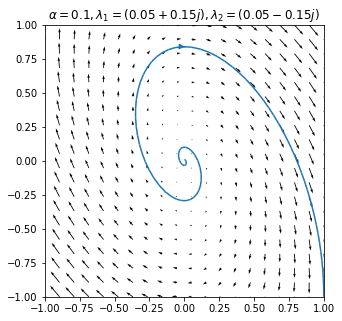

In [262]:
fig1 = plt.figure(figsize=(5, 5))

fig1a = fig1.add_subplot()

fig1a.quiver(X, Y, U, V)
fig1a.streamplot(X, Y, U, V, start_points=[(1,-1)], integration_direction="backward")

lam = np.round(np.linalg.eig(A)[0], 2)
plt.title(r"$\alpha={}, \lambda_1={}, \lambda_2={}$".format(a, lam[0], lam[1]))

plt.savefig(r".\plots\Task1_testStreamplot")
plt.show()

#### Reproduce the figure2 in exercise sheet, where obits are drawn using streamplot: 

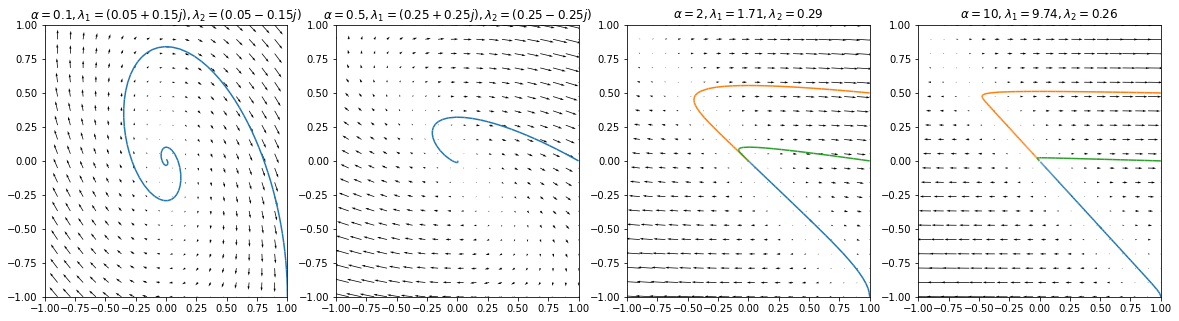

In [270]:
w = 1
Y, X = np.mgrid[-w:w:20j, -w:w:20j]

fig1 = plt.figure(figsize=(20, 5))
gs = gridspec.GridSpec(nrows=1, ncols=4)

a = .1
A = np.array([[a, a],
              [-.25, 0]])
U = A[0][0]*X + A[0][1]*Y
V = A[1][0]*X + A[1][1]*Y
fig1a = fig1.add_subplot(gs[0,0])
fig1a.quiver(X, Y, U, V)
fig1a.streamplot(X, Y, U, V, start_points=[(1,-1)], integration_direction="backward", arrowstyle="-")
lam = np.round(np.linalg.eig(A)[0], 2)
plt.title(r"$\alpha={}, \lambda_1={}, \lambda_2={}$".format(a, lam[0], lam[1]))

a = .5
A = np.array([[a, a],
              [-.25, 0]])
U = A[0][0]*X + A[0][1]*Y
V = A[1][0]*X + A[1][1]*Y
fig1b = fig1.add_subplot(gs[0,1])
fig1b.quiver(X, Y, U, V)
fig1b.streamplot(X, Y, U, V, start_points=[(1,0)], integration_direction="backward", arrowstyle="-")
lam = np.round(np.linalg.eig(A)[0], 2)
plt.title(r"$\alpha={}, \lambda_1={}, \lambda_2={}$".format(a, lam[0], lam[1]))

a = 2
A = np.array([[a, a],
              [-.25, 0]])
U = A[0][0]*X + A[0][1]*Y
V = A[1][0]*X + A[1][1]*Y
fig1c = fig1.add_subplot(gs[0,2])
fig1c.quiver(X, Y, U, V)
fig1c.streamplot(X, Y, U, V, start_points=[(1,-1)], integration_direction="backward", arrowstyle="-")
fig1c.streamplot(X, Y, U, V, start_points=[(1,0.5)], integration_direction="backward", arrowstyle="-")
fig1c.streamplot(X, Y, U, V, start_points=[(1,0)], integration_direction="backward", arrowstyle="-")
lam = np.round(np.linalg.eig(A)[0], 2)
plt.title(r"$\alpha={}, \lambda_1={}, \lambda_2={}$".format(a, lam[0], lam[1]))



a = 10
A = np.array([[a, a],
              [-.25, 0]])
U = A[0][0]*X + A[0][1]*Y
V = A[1][0]*X + A[1][1]*Y
fig1d = fig1.add_subplot(gs[0,3])
fig1d.quiver(X, Y, U, V)
fig1d.streamplot(X, Y, U, V, start_points=[(1,-1)], integration_direction="backward", arrowstyle="-")
fig1d.streamplot(X, Y, U, V, start_points=[(1,0.5)], integration_direction="backward", arrowstyle="-")
fig1d.streamplot(X, Y, U, V, start_points=[(1,0)], integration_direction="backward", arrowstyle="-")
lam = np.round(np.linalg.eig(A)[0], 2)
plt.title(r"$\alpha={}, \lambda_1={}, \lambda_2={}$".format(a, lam[0], lam[1]))

plt.savefig(r".\plots\Task1_exf2")
plt.show()

### Try to re-produce figure 2.5 in [Kuznetsov, p49] using 2 different parametrized $A_\alpha$

In [275]:
def task1plot_velocity_as_linear_System(A, label=""):
    w = 1
    Y, X = np.mgrid[-w:w:20j, -w:w:20j]

    plt.figure(figsize=(5, 5))

    lam = np.round(np.linalg.eig(A)[0], 2)

    U = A[0][0]*X + A[0][1]*Y
    V = A[1][0]*X + A[1][1]*Y

    plt.streamplot(X, Y, U, V)
    plt.title(r"$\alpha={}, \lambda_1={}, \lambda_2={}$".format(a, lam[0], lam[1]))
    plt.savefig(r".\plots\task1_{}".format(label))
    plt.show()

#### The first one is:

$$A_\alpha^{(1)} = \begin{bmatrix}
\alpha & \alpha \\
-1 & \alpha
\end{bmatrix}$$

#### Plot the corresponding phase portraits for $\alpha = -1.5, -0.5 \text{ and }0.5$

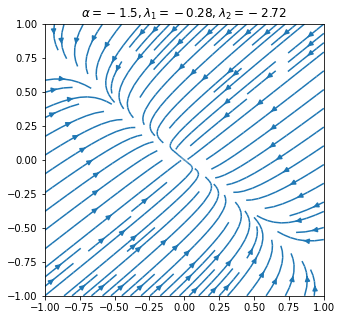

In [282]:
a = -1.5
A = np.array([[a, a],
              [-1, a]])
task1plot_velocity_as_linear_System(A, "A1_config1")

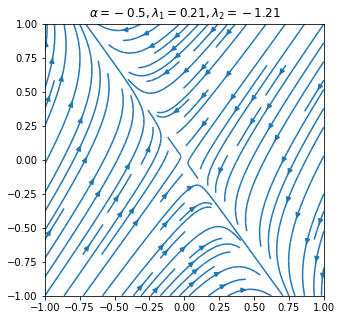

In [283]:
a = -.5
A = np.array([[a, a],
              [-1, a]])
task1plot_velocity_as_linear_System(A, "A1_config2")

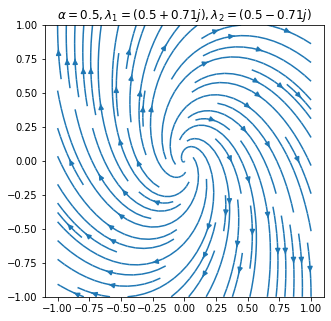

In [284]:
a = .5
A = np.array([[a, a],
              [-1, a]])
task1plot_velocity_as_linear_System(A, "A1_config3")

#### The second one is:
$$A_\alpha^{(2)} = \begin{bmatrix}
\alpha & \alpha \\
1 & \alpha
\end{bmatrix}$$

#### Plot the corresponding phase portraits for $\alpha = -0.5 \text{ and }1.5$

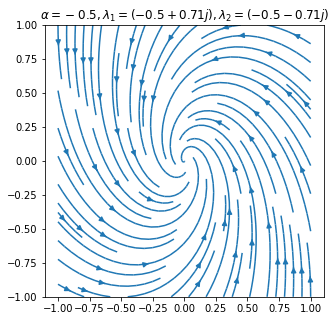

In [285]:
a = -.5
A = np.array([[a, a],
              [1, a]])
task1plot_velocity_as_linear_System(A, "A2_config1")

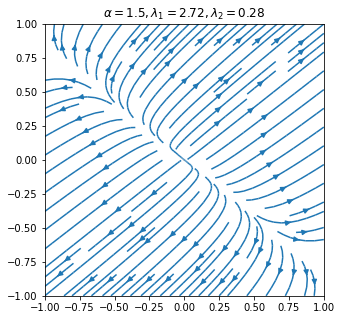

In [286]:
a = 1.5
A = np.array([[a, a],
              [1, a]])
task1plot_velocity_as_linear_System(A,"A2_config2")

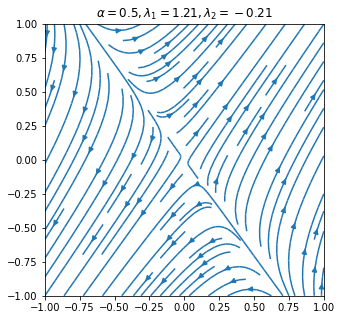

In [271]:
a = .5
A = np.array([[a, a],
              [1, a]])
task1plot_velocity_as_linear_System(A)

#### Task 2 Bifurcation

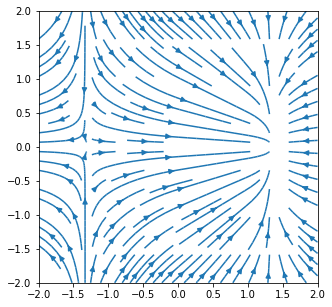

In [287]:
w = 2
Y, X = np.mgrid[-w:w:5j, -w:w:5j]

a = 2
U = a - X**2
V = -Y

fig2 = plt.figure(figsize=(5, 5))

fig2a = fig2.add_subplot()

#fig1a.quiver(X, Y, U, V)
fig2a.streamplot(X, Y, U, V, integration_direction="backward")

plt.show()


#### Bifurcation diagram 

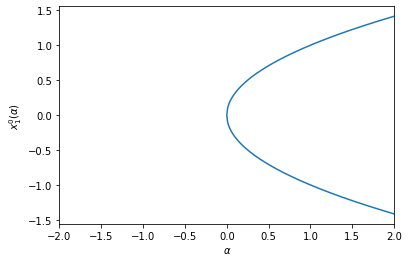

In [13]:
x = abs(np.arange(2, -0.01, -0.01))
y = np.power(x, 0.5)

x = np.append(x, x[::-1])
y = np.append(y, -y[::-1])

plt.plot(x, y)
plt.xlim((-2,2))
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$x_1^0(\alpha)$")
plt.show()

### Task 4

In [14]:
def chaotic_exp(r, x0=0.5, maxstep=100):
    xn = x0
    for i in range(maxstep):
        xn = r*xn*(1-xn)
        yield xn

def task4_plot(r):
    t=np.arange(100)
    xn=[]
    for x in chaotic_exp(r):
        xn.append(x)

    plt.xlabel("N")
    plt.ylabel("$X_n$")
    plt.plot(t, xn)
    plt.show()

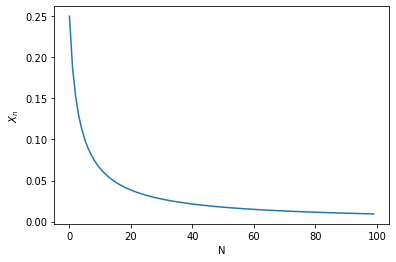

In [15]:
task4_plot(2)

### Task 3
plot surface

In [250]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

def plot_implicit(fn, bbox=(-2.5,2.5)):
    ''' create a plot of an implicit function
    fn  ...implicit function (plot where fn==0)
    bbox ..the x,y,and z limits of plotted interval'''
    xmin, xmax, ymin, ymax, zmin, zmax = bbox*3
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    A = np.linspace(xmin, xmax, 100) # resolution of the contour
    B = np.linspace(xmin, xmax, 15) # number of slices
    A1,A2 = np.meshgrid(A,A) # grid on which the contour is plotted

    for z in B: # plot contours in the XY plane
        X,Y = A1,A2
        Z = fn(X,Y,z)
        cset = ax.contour(X, Y, Z+z, [z], zdir='z')
        # [z] defines the only level to plot for this contour for this value of z

    for y in B: # plot contours in the XZ plane
        X,Z = A1,A2
        Y = fn(X,y,Z)
        cset = ax.contour(X, Y+y, Z, [y], zdir='y')

    for x in B: # plot contours in the YZ plane
        Y,Z = A1,A2
        X = fn(x,Y,Z)
        cset = ax.contour(X+x, Y, Z, [x], zdir='x')

    # must set plot limits because the contour will likely extend
    # way beyond the displayed level.  Otherwise matplotlib extends the plot limits
    # to encompass all values in the contour.
    ax.set_zlim3d(zmin,zmax)
    ax.set_xlim3d(xmin,xmax)
    ax.set_ylim3d(ymin,ymax)

    plt.show()


In [242]:
def task3_surface(x, y, z):
    return x + y*z -z**3

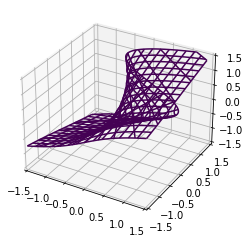

In [251]:
plot_implicit(task3_surface, bbox=(-1.5,1.5))